# Implementation of SGD from scratch in Python

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

# Dataset Analysis

In [2]:
# Let's load the dataset
X = load_boston()
Y = load_boston().target

In [3]:
print(X.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# Let's create a dataframe from the boston_data
boston_data = pd.DataFrame(X.data, columns = X.feature_names)

In [5]:
# Columns 
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# let's analyse the characteristics of the dataset
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# target variable
boston_data['PRICE'] = load_boston().target

In [9]:
# Let's analyse the features
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


We have no "Missing" or "NaN" values present in our dataset

In [10]:
boston_data.shape

(506, 14)

In [11]:
Y = boston_data['PRICE']
boston_data.drop('PRICE', axis = 1, inplace = True)

In [12]:
# let's standardize our data
boston_data = (boston_data - boston_data.mean())/boston_data.std()
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


## Splitting data into Train and test:

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston_data, Y, test_size = 0.3)

In [14]:
# Let's print the shape of the train and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [15]:
x_train["PRICE"] = y_train

Let's create our own cost function

In [16]:
def compute_cost(b, M, feat, label):
    totalError = 0
    for i in range(0, len(feat)):
        x = feat
        y = label
        totalError += (y[:,i] - (np.dot(x[i] , M) + b)) ** 2
    return totalError / len(x)

In [17]:
# The total sum of squares (proportional to the variance of the data)i.e. ss_tot 
# The sum of squares of residuals, also called the residual sum of squares i.e. ss_res 
# the coefficient of determination i.e. r^2(r squared)
def r_sq_score(b, M, feat, label):
    for i in range(0, len(feat)):
        x = feat
        y = label
        mean_y = np.mean(y)
        ss_tot = sum((y[:,i] - mean_y) ** 2)
        ss_res = sum(((y[:,i]) - (np.dot(x[i], M) + b)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
    return r2

In [53]:
def gradient_decent(W, b, train_data, x_test, y_test, learning_rate):
    n_batches = 10
    batch_size = 70
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_batches):
        
        # Train sample
        train_sample = train_data.sample(batch_size)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , W) + b))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , W) + b))
        
            W1 = W - learning_rate * partial_deriv_m 
            b1 = b - learning_rate * partial_deriv_b
        # let's check for equality of weights, i.e., whether our weights have been updated or not
        if (W==W1).all():
            break
        else:
            W = W1
            b = b1
            learning_rate = learning_rate/1.5
       
            
        error_train = compute_cost(b, W, x, y)
        cost_train.append(error_train)
        error_test = compute_cost(b, W, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
        
    return W, b, cost_train, cost_test

Coefficient: [[-4.10094529e-01]
 [-5.13388294e-01]
 [-7.26781661e-01]
 [ 2.82174873e-01]
 [-2.36089222e-01]
 [ 4.24323053e+00]
 [ 1.47460506e-01]
 [-1.89837381e+00]
 [-3.48537030e-04]
 [-6.56365780e-01]
 [-3.19945186e+00]
 [ 1.83581899e+00]
 [-3.17616435e+00]] 
 y_intercept: [[20.16250602]]


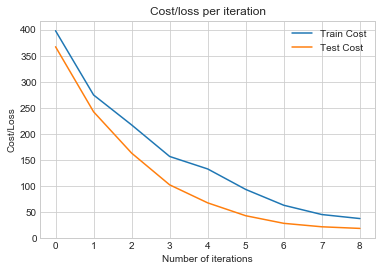

In [54]:
# Run our model
learning_rate = 0.001
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

# Plot train and test error in each iteration
plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

# Implement Sklearn SGD

In [20]:
boston = load_boston()

In [21]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [22]:
bos['PRICE'] = boston.target

X_ = bos.drop('PRICE', axis = 1)
Y_ = bos['PRICE']

In [23]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_, Y_, test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


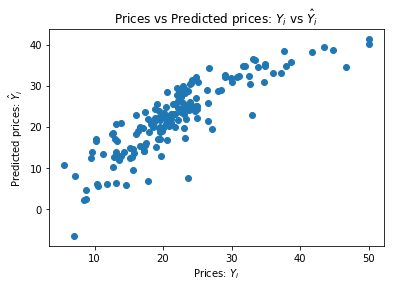

In [24]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

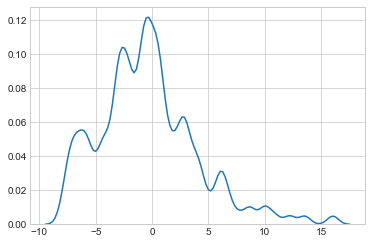

In [25]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


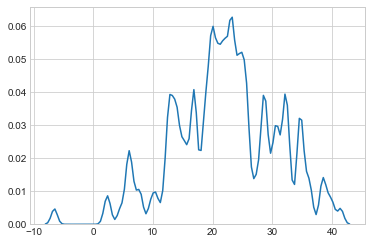

In [26]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

# Comparison between implemented SGD and sklearn LinearRegression

In [55]:
# https://stackoverflow.com/questions/45173451/scikit-learn-how-to-calculate-root-mean-square-error-rmse-in-percentage
# let's analyse the Implemented SGD first
# We will consider the mean squared error
error = compute_cost(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error: %.2f" % (error))
# Explained variance score : 1 is perfect prediction
r_squared = r_sq_score(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Variance score: %.2f" % r_squared)

Mean squared error: 18.19
Variance score: 0.62


In [56]:
# Let's analyse the Sklearn LinearRegression
# The mean squared error
from sklearn.metrics import r2_score
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(Y_test, Y_pred))

Mean squared error: 19.36
Variance score: 0.71


## Scatter plot for predicted vs test

### sklearn LineaRegression (SGD) vs Implemented SGD

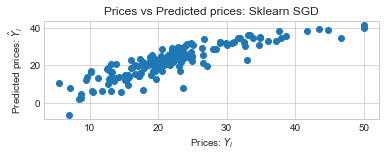

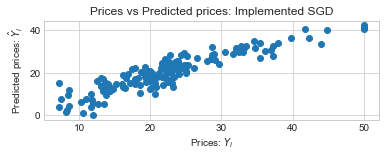

In [57]:
# sklearn SGD
plt.figure(1)
plt.subplot(211)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Sklearn SGD")
plt.show()

# Implemented SGD
plt.subplot(212)
plt.scatter([y_test], [(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

### Analyse Distribution Error

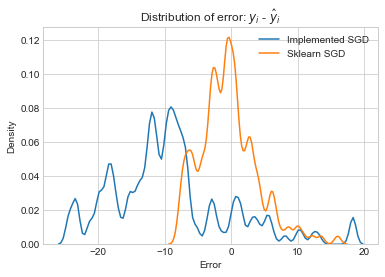

In [58]:
# Distribution of error
# for implemented SGD
delta_y_im = np.asmatrix(y_test) - (np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)

# for sklearn SGD
delta_y_sk = Y_test - Y_pred


import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.asarray(delta_y_im)[0], label = "Implemented SGD", bw = 0.5)
sns.kdeplot(np.array(delta_y_sk), label = "Sklearn SGD", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

### Distribution of the predicted values 

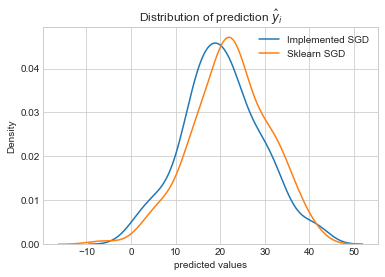

In [59]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b).T[0], label = "Implemented SGD")
sns.kdeplot(Y_pred, label = "Sklearn SGD")
plt.title("Distribution of prediction $\hat{y}_i$")
plt.xlabel("predicted values")
plt.ylabel("Density")
plt.show()

Conclusion:
      * The mean squared error(mse) for implemented SGD is 18.19 and for Sklearn SGD is 19.36, both are nearly equal.
      * The variance score for implemented SGD is 0.62 and that of Sklearn SGD is 0.71
      * The distribution of predicted value graph, It is clear that prediction of implemented SGD and sklearn SGD both are
        ovelapping(not perfectly) but the density of sklearn SGD is nearly 92% whereas implemented SGD is
        nearly 87% means the implemented SGD is predicting high value but in actual it is not.
      * During comparing scikit-learn implemented linear regression and explicitly implemented linear regression using
        optimization algorithm(sgd) in python we see there are not much differences between both of them but sklearn SGD
        performs well over implemented SGD.
      * From the distribution of error graph, for implemented SGD the error graph is more inclined towards -Ve side and
        Sklearn SGD is nearly distributed around zero value
      * Overall we can say the regression line not fits data perfectly but it is okay. But our goal is to find the
        line/plane that best fits our data means minimize the error i.e. mse should be close to 0